In [1]:
import pandas as pd
import numpy as np
import quandl
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
#import files for currency code (not available in this case)
currency=pd.read_csv("country-code-to-currency-code-mapping.csv")
#currency_code=list(set(currency.Code))
codelist=list(set(currency.Code))

In [11]:
#get Bitcoin price in USD uptodate
#data source link https://www.quandl.com/data/BCHAIN/MKPRU-Bitcoin-Market-Price-USD
Bitcoin_price=quandl.get("BCHAIN/MKPRU", authtoken="iY9JSt_h18shZcXLXJ-y")

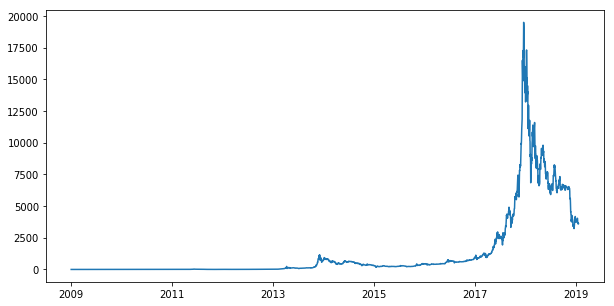

In [16]:
#plot Bitcoin price in USD
fig = plt.figure(figsize=(10,5))
plt.plot(Bitcoin_price)

In [17]:
#Export Bitcoin Price in USD
Bitcoin_price.to_csv("Bitcoin_Price_in_USD.csv")

In [2]:
currency_code=['XRP','LTC','MWK','SZL','ETH','XAR','TTD','NPR','ZMW','PAB','BWP','BYN','MUR','BAM','EGP','CRC','UYU','JOD',
              'XAF','TZS','HNL','KZT','RWF','UGX','QAR','MAD','LKR','BDT','DOP','GHS','IRR','UAH','NGN','IDR','PKR','VND',
              'TWD','AED','VEF','KRW','ILS','PEN','SAR','PHP','CLP','ZAR','PLN','BRL','CZK','MXN','INR','KES','RUB','NOK',
              'ARS','EUR','NZD','THB','HRK','CHF','CNY','TRY','AUD','SGD','SEK','HKD','MYR','HUF','RON','JPY','CAD','COP',
              'DKK','USD','GBP','XMR','ISK','XOF','GEL','KWD','RSD','HTG','DASH','OMR','BGN','PYG','JMD','MDL','AOA','BHD',
              'BOB','MMK','ALL','GTQ','TND','BND','IQD','SYP','SCR','PGK','AMD','MGA','KHR','MOP','MZN','CUC','BIF','XAG',
              'XAU','UZS','GGP','DZD','ETB','CNH','BYR','KGS','GIP','AZN','LBP','NAD','AFN','SHP','LSL','LTL']
#get tickers to download currency/bitcoin exchange rate data
tickers=[]
for c in currency_code:
    tickers.append("LOCALBTC/"+c)

# list of crypto currencies other than Bitcoin
'XRP': Ripple, 
'LTC': Litecoin, 
'ETH': Ethereum, 
'XAR': Xaru Coin, 
'XMR': Monero, 
'DASH': Dash, 

# list of metal
'XAG':One troy ounce of gold,
'XAU':Philadelphia Gold and Silver Index,

# currency symbol not in codelist
'CNH': Offshore Chinese Yuan,
'SHP': Saint Helena pound,
'ZMW': Zambian currency,
'BYN': Blurusian Currency,
'CUC': Cubian Curreny

In [43]:
#get data from quandl
quandl.ApiConfig.api_key = 'iY9JSt_h18shZcXLXJ-y'
dt=quandl.get(tickers)

In [72]:
#export bitcoin exchange rate data set
dt.to_csv("Bitcoin_to_Currency_Exchange_Rate.csv")

In [3]:
dt=pd.read_csv("Bitcoin_to_Currency_Exchange_Rate.csv")
#get daily average exchange rate and daily volume
daily_average_exchange=dt.iloc[:,[i*4 for i in list(range(len(currency_code)))]]
daily_volume=dt.iloc[:,[i*4+3 for i in list(range(len(currency_code)))]]

In [4]:
#change column names
daily_average_exchange.columns=currency_code

In [5]:
#build up a correlation matrix
corr=daily_average_exchange.corr()

In [6]:
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links.head()

,var1,var2,value
0,LTC,LTC,1.000000
1,LTC,MWK,0.065316
2,LTC,SZL,0.042805
3,LTC,ETH,0.014892
4,LTC,XAR,-0.011288


In [27]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1) 
# at the same time, we may need to remove those highly correlations due to rare observations
threshold=0.5
links_filtered=links.loc[ (links['value'] > threshold) & (links['var1'] != links['var2'])& (links['value'] < 0.95)]
links_filtered.head()

,var1,var2,value
97,LTC,MGA,0.940741
100,LTC,SHP,0.799683
187,MWK,MDL,0.616828
385,ETH,JMD,0.649837
396,ETH,MGA,0.711993


In [28]:
len(links_filtered)

572

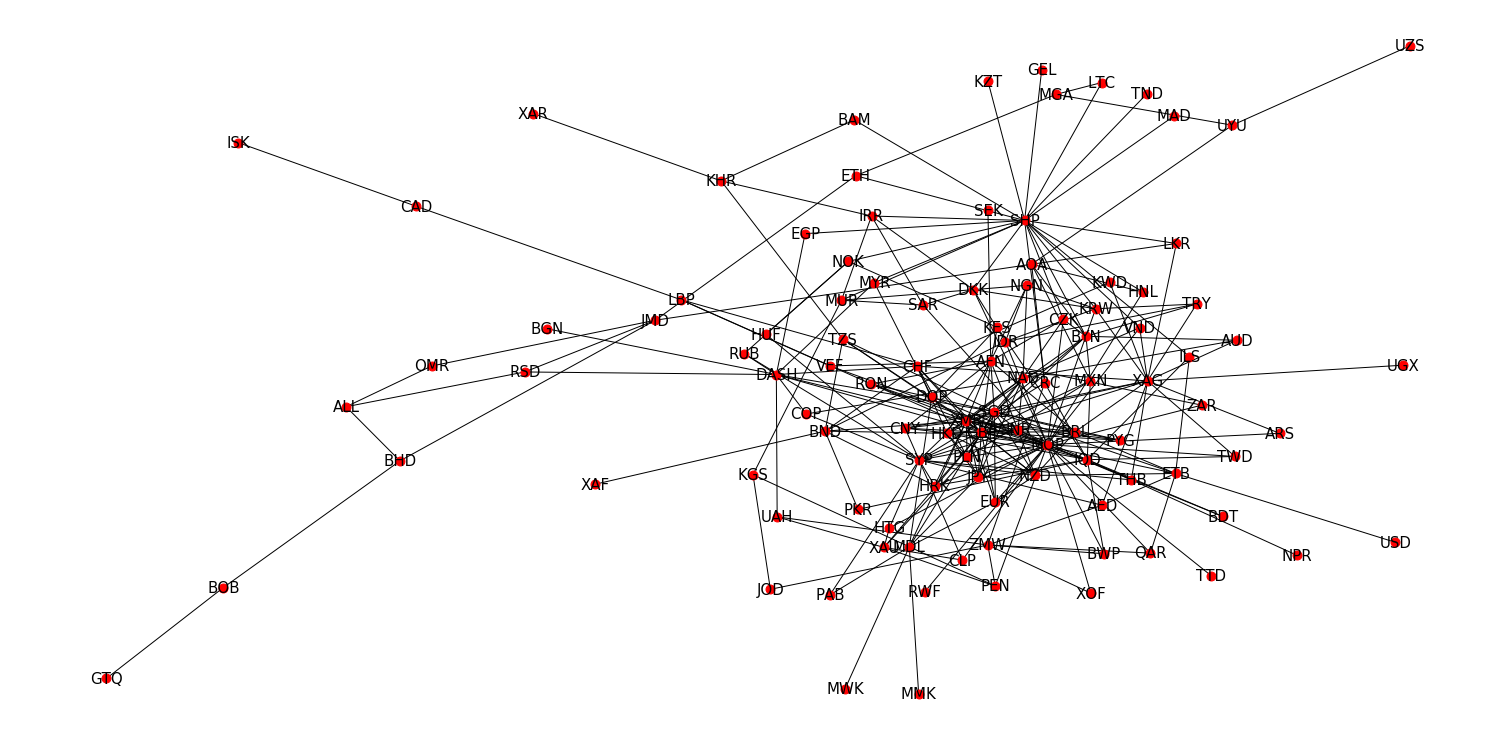

In [29]:
fig = plt.figure(figsize=(20,10))
# Build our graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
# Plot the threshold network:
nx.draw(G, with_labels=True, node_color='red', node_size=80, edge_color='black', linewidths=1, font_size=15) 

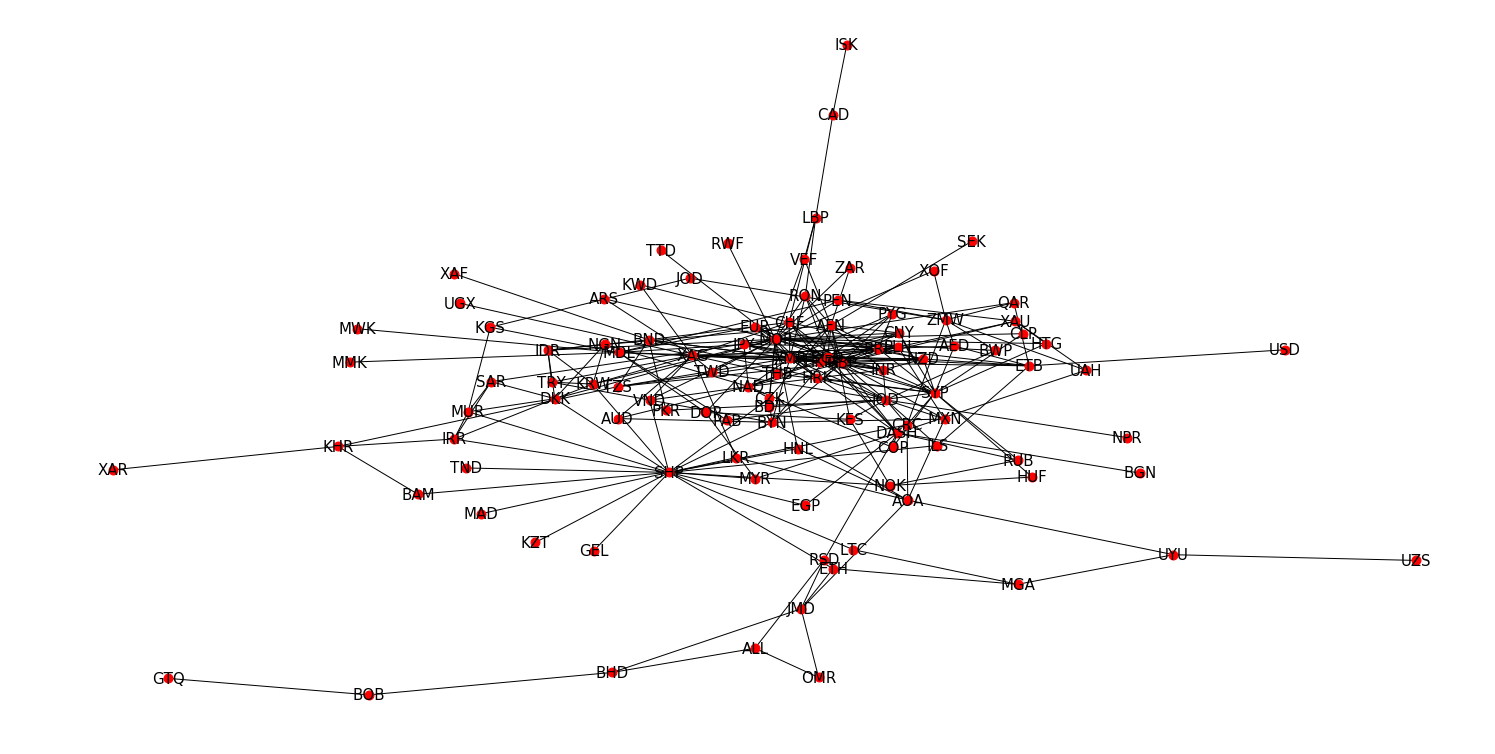

In [30]:
#do the same thing for volume data
#change column names
daily_volume.columns=currency_code
#build up a correlation matrix
corr=daily_average_exchange.corr()
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1) 
# at the same time, we may need to remove those highly correlations due to rare observations
threshold=0.5
links_filtered=links.loc[ (links['value'] > threshold) & (links['var1'] != links['var2'])& (links['value'] < 0.95)]
fig = plt.figure(figsize=(20,10))
# Build our graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
# Plot the threshold network:
nx.draw(G, with_labels=True, node_color='red', node_size=80, edge_color='black', linewidths=1, font_size=15) 